# Plotting for Dataframe
## Quizz 19

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [48]:
# Change False to True for this block of code to see what it does

# groupby() without as_index
if True:
    first_even = example_df.groupby('even').first()
    print first_even
    #print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame

      above_three  value
even                    
False       False      1
True        False      2


In [49]:
# groupby() with as_index=False
if True:
    first_even = example_df.groupby('even', as_index=False).first()
    print first_even
    print first_even['even'] # Now 'even' is still a column in the DataFrame

    even above_three  value
0  False       False      1
1   True       False      2
0    False
1     True
Name: even, dtype: bool


In [50]:
#filename = '/datasets/ud170/subway/nyc_subway_weather.csv'
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

# Analysis
## Question
relation between weather factors and use of subway
relation between day of the week and use of subway
what are crowdy hours
what are the top used stations
what is the maximum flows (/hour)

In [51]:
subway_df.shape

(42649, 27)

In [52]:
subway_df.notnull().sum()

UNIT               42649
DATEn              42649
TIMEn              42649
ENTRIESn           42649
EXITSn             42649
ENTRIESn_hourly    42649
EXITSn_hourly      42649
datetime           42649
hour               42649
day_week           42649
weekday            42649
station            42649
latitude           42649
longitude          42649
conds              42649
fog                42649
precipi            42649
pressurei          42649
rain               42649
tempi              42649
wspdi              42649
meanprecipi        42649
meanpressurei      42649
meantempi          42649
meanwspdi          42649
weather_lat        42649
weather_lon        42649
dtype: int64

In [53]:
# Accessing elements
print subway_df.iloc[0]
print "----"
print subway_df.iloc[42648]

UNIT                              R003
DATEn                         05-01-11
TIMEn                         00:00:00
ENTRIESn                       4388333
EXITSn                         2911002
ENTRIESn_hourly                      0
EXITSn_hourly                        0
datetime           2011-05-01 00:00:00
hour                                 0
day_week                             6
weekday                              0
station                  CYPRESS HILLS
latitude                       40.6899
longitude                     -73.8726
conds                            Clear
fog                                  0
precipi                              0
pressurei                        30.22
rain                                 0
tempi                             55.9
wspdi                              3.5
meanprecipi                          0
meanpressurei                   30.258
meantempi                        55.98
meanwspdi                         7.86
weather_lat              

In [54]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [55]:
# groupby() with as_index=False
if True:
    grouped_data = subway_df.groupby('UNIT', as_index=False)
    ridership_byStn = grouped_data['ENTRIESn_hourly','EXITSn_hourly'].mean()
    df =  ridership_byStn.sort_values(by='ENTRIESn_hourly',ascending=False).head()
    print df
    #print first_even['even'] # Now 'even' is still a column in the DataFrame

    UNIT  ENTRIESn_hourly  EXITSn_hourly
64  R084     10046.634409    7888.913978
16  R022      9534.258065    7975.774194
8   R012      8700.333333    5830.758065
37  R046      8360.844086    5207.295699
44  R055      8359.172043    6316.951613


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

#df.plot()
#plt.show()

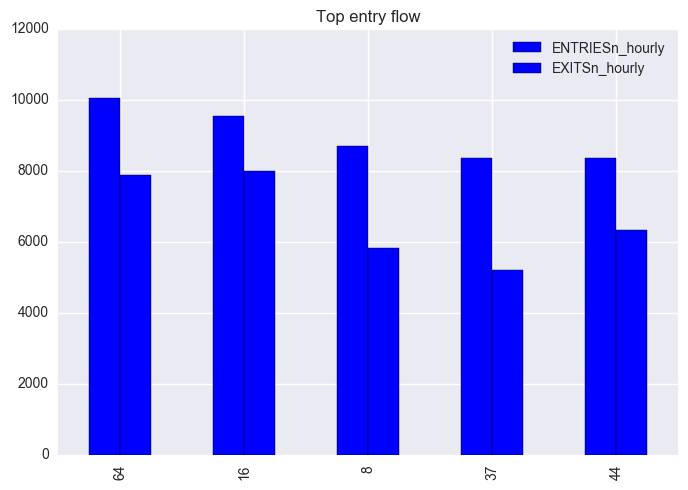

In [57]:
fig = plt.figure(figsize=(8,5))
df.plot(kind="bar", color = "blue",title='Top entry flow')
plt.show()

In [58]:
if True:
    grouped_data = subway_df.groupby(['UNIT','day_week'], as_index=False)
    ridership_byStn = grouped_data['ENTRIESn_hourly','EXITSn_hourly'].max()
    df =  ridership_byStn.sort_values(by='ENTRIESn_hourly',ascending=False).head()
    print df
    #print first_even['even'] # Now 'even' is still a column in the DataFrame

     UNIT  day_week  ENTRIESn_hourly  EXITSn_hourly
449  R084         1          32814.0        21156.0
100  R020         2          32289.0        33215.0
116  R022         4          32289.0        22518.0
50   R011         1          32202.0         7971.0
98   R020         0          31859.0        29930.0


In [59]:
if True:
    grouped_data = subway_df.groupby(['UNIT','day_week'], as_index=False)
    ridership_byStn = grouped_data['ENTRIESn_hourly','EXITSn_hourly'].min()
    df =  ridership_byStn.sort_values(by='ENTRIESn_hourly',ascending=False).head()
    print df

     UNIT  day_week  ENTRIESn_hourly  EXITSn_hourly
452  R084         4           1707.0          622.0
450  R084         2           1611.0          492.0
451  R084         3           1404.0          495.0
449  R084         1           1140.0          401.0
60   R012         4           1069.0          633.0


In [60]:
if True:
    grouped_data = subway_df.groupby(['UNIT','day_week'], as_index=False)
    ridership_byStn = grouped_data['ENTRIESn_hourly','EXITSn_hourly'].mean()
    df =  ridership_byStn.sort_values(by='ENTRIESn_hourly',ascending=False).head()
    print df

     UNIT  day_week  ENTRIESn_hourly  EXITSn_hourly
450  R084         2     12246.125000    9455.041667
451  R084         3     11986.083333    9293.958333
114  R022         2     11926.000000    9792.791667
449  R084         1     11893.933333    9177.633333
262  R046         3     11565.958333    7135.791667


In [61]:
if True:
    grouped_data = subway_df.groupby(['rain'], as_index=False)
    ridership_byStn = grouped_data['ENTRIESn_hourly','EXITSn_hourly'].mean()
    df =  ridership_byStn.sort_values(by='ENTRIESn_hourly',ascending=False)
    print df

   rain  ENTRIESn_hourly  EXITSn_hourly
1     1      2028.196035    1459.373918
0     0      1845.539439    1333.111451
